<a href="https://colab.research.google.com/github/PercyaDJ/big-data-iae/blob/main/Notebook_Cours_Regression_CMSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Régression sur le dataset Ames Housing


## Objectifs de ce notebook :
## - Découvrir le dataset Ames Housing
## - Construire un premier modèle de régression simple
## - Étendre vers une régression multiple
## - Évaluer le modèle (R², RMSE, MAE)
## - Analyser les résidus et discuter des limites


In [5]:
# importation des packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error
)
from sklearn.model_selection import train_test_split

sns.set(style="whitegrid", context="notebook")
pd.set_option("display.max_columns", None)


In [6]:
# Chargement du Dataset
# Pour avoir accès au dictionnaire de données  : https://github.com/Padre-Media/dataset/blob/main/Ames%20Data%20Dictionary.txt

url = "https://raw.githubusercontent.com/austinlasseter/hosting_some_files/main/pandas_files/iowa.csv"
df = pd.read_csv(url)

df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



# **Questions :**
# 1. Que représente une ligne dans ce dataset ?
# 2. Quelle est la variable que nous voulons prédire (notre "y") ?
# 3. Quelles variables semblent évidemment liées au prix d'une maison ?


## Réponses aux questions :

1. Une ligne dans ce dataset représente **une vente de maison individuelle** à Ames, Iowa.
2. La variable que nous voulons prédire (notre "y") est `SalePrice`, le prix de vente de la maison.
3. Plusieurs variables semblent évidemment liées au prix d'une maison, par exemple :
   - `GrLivArea` (surface habitable au-dessus du sol en pieds carrés)
   - `OverallQual` (qualité globale des matériaux et de la finition)
   - `YearBuilt` (année de construction initiale)
   - `TotalBsmtSF` (surface totale du sous-sol)
   - `GarageCars` (capacité du garage en nombre de voitures)
   - `FullBath` (nombre de salles de bain complètes au-dessus du sol)
   - `Neighborhood` (emplacement physique dans Ames)

Ces variables sont intuitivement importantes pour déterminer la valeur d'une propriété.

In [7]:
# On regarde la structure du dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#  **Questions :**
# 1. Combien de variables numériques vs catégorielles voyez-vous ?
# 2. La variable cible `SalePrice` est-elle bien numérique ?
# 3. Y a-t-il des colonnes avec beaucoup de valeurs manquantes ?


## Réponses aux questions :

1.  En examinant la sortie de `df.info()`:
    *   **Variables numériques :** Il y a 3 variables de type `float64` et 35 de type `int64`, ce qui fait un total de **38 variables numériques**.
    *   **Variables catégorielles :** Il y a 43 variables de type `object`, ce qui représente **43 variables catégorielles**.
2.  Oui, la variable cible `SalePrice` est bien numérique, de type `int64`.
3.  Oui, plusieurs colonnes présentent un nombre significatif de valeurs manquantes (non-null count bien inférieur à 1460):
    *   `Alley` (91 non-null)
    *   `MasVnrType` (588 non-null)
    *   `LotFrontage` (1201 non-null)
    *   `FireplaceQu` (770 non-null)
    *   `PoolQC` (7 non-null)
    *   `Fence` (281 non-null)
    *   `MiscFeature` (54 non-null)

    Les colonnes `Alley`, `PoolQC`, `Fence`, et `MiscFeature` sont celles qui ont le plus grand nombre de valeurs manquantes, suggérant qu'elles pourraient être omises ou nécessiter un traitement spécial.

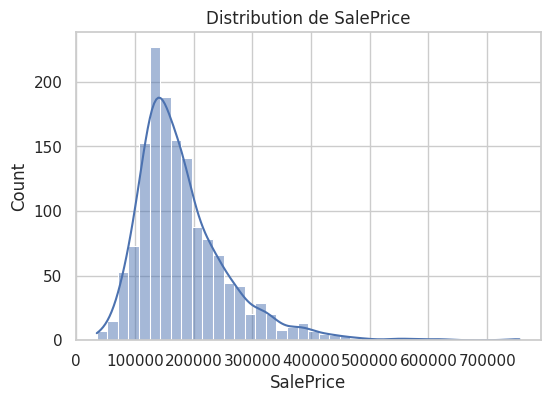

In [8]:
# Distribution de SalesPrice
plt.figure(figsize=(6,4))
sns.histplot(df["SalePrice"], bins=40, kde=True)
plt.title("Distribution de SalePrice")
plt.show()


#  **Questions :**
# 1. La distribution de `SalePrice` est-elle symétrique ou asymétrique ?
# 2. Pensez-vous qu'un modèle linéaire pourra bien gérer des prix très extrêmes ?

## Réponses aux questions :

1. La distribution de `SalePrice` est **asymétrique et fortement étalée vers la droite (skewed right)**. Cela signifie qu'il y a un plus grand nombre de maisons avec des prix plus bas et quelques maisons avec des prix très élevés, créant une longue queue vers la droite.
2. Non, un modèle linéaire simple aura probablement du mal à bien gérer des prix très extrêmes. Les modèles linéaires supposent une relation linéaire entre les variables et une distribution normale des erreurs. La forte asymétrie de `SalePrice` peut entraîner des prédictions moins précises pour les valeurs extrêmes et une violation de ces hypothèses. Des transformations (comme la transformation logarithmique) de la variable cible sont souvent utilisées pour rendre la distribution plus symétrique et améliorer les performances du modèle linéaire sur de telles données.

In [9]:
import pandas as pd

url = "https://raw.githubusercontent.com/austinlasseter/hosting_some_files/main/pandas_files/iowa.csv"
df = pd.read_csv(url)

# filtrage de quelques outliers très extremes 3 IQR au lieu des 1.5 IQR habituels
Q1 = df["SalePrice"].quantile(0.25)
Q3 = df["SalePrice"].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 3 * IQR  # plus raisonnable que 20*IQR ici
print("Borne supérieure (3*IQR) :", upper_bound)

df_clean = df[df["SalePrice"] <= upper_bound].copy()

print("Taille avant filtrage :", len(df))
print("Taille après filtrage :", len(df_clean))

Borne supérieure (3*IQR) : 466075.0
Taille avant filtrage : 1460
Taille après filtrage : 1448


# **Questions :**
# 1. Combien de lignes avons-nous retirées avec ce filtrage ?
# 2. Est-ce que ça vous semble raisonnable ou trop agressif ?
# 3. Quel serait le risque si nous gardions tous les outliers extrêmes dans le modèle ?


## Réponses aux questions :

1. Nous avons retiré **12 lignes** avec ce filtrage (1460 - 1448 = 12).
2. Cela semble **raisonnable**. L'utilisation d'une borne supérieure de `3 * IQR` est une approche moins agressive que le `1.5 * IQR` habituel, ce qui signifie que nous ne supprimons que les valeurs très extrêmes. Enlever environ 0.8% du dataset est acceptable pour traiter des outliers qui pourraient nuire à la modélisation.
3. Si nous gardions tous les outliers extrêmes dans le modèle, le risque serait que ces points influencent de manière disproportionnée la ligne de régression. Cela pourrait entraîner des **coefficients biaisés**, un **ajustement moins précis** pour la majorité des données et une **diminution de la performance prédictive** générale du modèle. Les valeurs aberrantes peuvent faire en sorte que le modèle s'adapte à elles plutôt qu'à la tendance générale, augmentant ainsi l'erreur et rendant le modèle moins robuste.

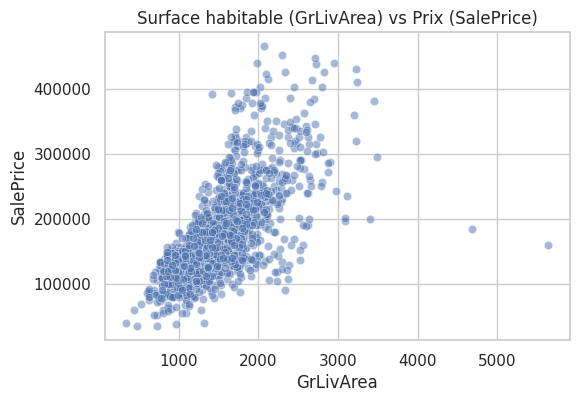

In [10]:
# On cherche à modéliser `SalesPrice` avec la variable `GrLivArea` (surface habitable).
# On dessine un scatterplot pour regarder si ça pourrait être pertinent.

plt.figure(figsize=(6,4))
sns.scatterplot(x="GrLivArea", y="SalePrice", data=df_clean, alpha=0.5)
plt.title("Surface habitable (GrLivArea) vs Prix (SalePrice)")
plt.show()


# **Questions :**
# 1. La relation semble-t-elle approximativement linéaire ?
# 2. Voyez-vous des points qui ne suivent pas le nuage de points ?


## Réponses aux questions :

1. La relation semble **approximativement linéaire**. On observe une tendance générale à l'augmentation du prix (`SalePrice`) avec l'augmentation de la surface habitable (`GrLivArea`).
2. Oui, on peut encore voir quelques points qui ne suivent pas parfaitement le nuage principal. Par exemple, il y a des maisons avec une grande `GrLivArea` qui ont un `SalePrice` relativement bas, et inversement. Ces points représentent des cas où d'autres facteurs non représentés sur ce graphique influencent fortement le prix.

In [11]:
# On effectue une modélisation de regression simple avec 1 seule variable explicative :

# On définit X et Y dans la relation

X = df_clean[["GrLivArea"]]
y = df_clean["SalePrice"]

linreg_simple = LinearRegression() # On initialise le modèle
linreg_simple.fit(X, y) # On fit le modèle sur X et y, en d'autres termes, on laisse le modèle apprendre quels coefficients de X permettent au mieux d'approcher Y

y_pred = linreg_simple.predict(X) # Maintenant que le modèle est entrainé, on l'utilise pour prédire de nouvelles valeurs de Y

print("Coefficient (GrLivArea) :", linreg_simple.coef_[0]) # On affiche le coefficient de X
print("Intercept :", linreg_simple.intercept_) # On affiche l'intercept
print("R² (train) :", r2_score(y, y_pred)) # On affiche le score R² pour connaitre la proportion de la variance de Y que le modèle arrive à prédire


Coefficient (GrLivArea) : 95.61362492316208
Intercept : 34051.216580184875
R² (train) : 0.4611327526585418


# **Questions :**
# 1. Comment interpréter le coefficient de `GrLivArea` ? (Que se passe-t-il si on ajoute 1 m² ? 10 m² ?)
# 2. Le R² vous semble-t-il élevé, faible, moyen ?
# 3. Est-ce surprenant si on se dit que le prix dépend d'autres facteurs (quartier, qualité, garage, etc.) ?


## Réponses aux questions :

1.  Le coefficient de `GrLivArea` est d'environ 95.61. Cela signifie que pour chaque pied carré (`sq ft`) supplémentaire de surface habitable au-dessus du sol, le prix de vente (`SalePrice`) est estimé augmenter de 95.61 $. Si on ajoute 10 pieds carrés, le prix augmenterait de 956.1 $.
2.  Un R² de 0.4611 (soit environ 46.1%) est un score **moyen**. Il indique que la variable `GrLivArea` explique près de la moitié de la variance du `SalePrice`, ce qui est significatif, mais une grande partie de la variance reste inexpliquée.
3.  Non, ce n'est **pas surprenant**. Le prix d'une maison est influencé par une multitude de facteurs (comme le quartier, la qualité générale, la présence d'un garage, l'année de construction, etc.) que ce modèle simple ne prend pas en compte. Le R² reflète bien le fait que `GrLivArea` est une variable importante, mais insuffisante à elle seule pour prédire parfaitement le prix.

In [12]:
# Ajout d'un train/test split
X = df_clean[["GrLivArea"]]
y = df_clean["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

linreg_simple = LinearRegression()
linreg_simple.fit(X_train, y_train)

y_train_pred = linreg_simple.predict(X_train)
y_test_pred = linreg_simple.predict(X_test)

print("R² train :", r2_score(y_train, y_train_pred))
print("R² test  :", r2_score(y_test, y_test_pred))


R² train : 0.4599733603804722
R² test  : 0.42354257109117865


#  **Questions :**
# 1. Le R² est-il très différent entre train et test ?
# 2. Si R² train >> R² test, que cela signifierait-il ?
# 3. Pourquoi est-ce important de séparer train et test, même avec une régression linéaire simple ?


## Réponses aux questions :

1. Le R² est-il très différent entre train et test ?
   Non, les R² pour les ensembles d'entraînement (0.4599) et de test (0.4235) ne sont **pas très différents**. La légère baisse du R² de test par rapport au R² d'entraînement est normale et ne suggère pas de problème majeur.

2. Si R² train >> R² test, que cela signifierait-il ?
   Si R² train était significativement supérieur à R² test, cela signifierait que le modèle est en **surapprentissage (overfitting)**. Le modèle aurait mémorisé les données d'entraînement, y compris le bruit, et ne généraliserait pas bien à de nouvelles données inconnues. Dans ce cas, il serait trop complexe pour les données ou n'aurait pas été bien régularisé.

3. Pourquoi est-ce important de séparer train et test, même avec une régression linéaire simple ?
   Il est important de séparer les ensembles d'entraînement et de test pour évaluer la **capacité de généralisation** du modèle. Même avec une régression linéaire simple, cela permet de s'assurer que le modèle ne s'est pas simplement ajusté au bruit ou aux particularités spécifiques de l'ensemble d'entraînement. Le score sur l'ensemble de test donne une estimation plus réaliste des performances du modèle sur des données qu'il n'a jamais vues.

In [13]:
# On passe à la regression linéaire multiple (avec plusieurs variables numériques)
features_num = ["GrLivArea", "OverallQual", "GarageCars", "YearBuilt"] # Liste des variables explicatives choisies

df_num = df_clean[features_num + ["SalePrice"]].dropna() # On crée un nouveau DF sans valeurs manquantes

X = df_num[features_num] # X reçoit toutes les variables numériques séléctionnées
y = df_num["SalePrice"] # Y est toujours Sales Price

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
) # On split le dataset en 2, une partie servira de teste et une autre de train.

linreg_multi = LinearRegression() # On initialise le modèle
linreg_multi.fit(X_train, y_train) # On entraine le modèle

y_train_pred = linreg_multi.predict(X_train) # On utilise le modèle pour prédire les valeurs de Y estimées.
y_test_pred = linreg_multi.predict(X_test)

print("R² train :", r2_score(y_train, y_train_pred)) # On affiche les R²
print("R² test  :", r2_score(y_test, y_test_pred))

pd.DataFrame({"Variable": features_num, "Coef": linreg_multi.coef_}) # On affiche les coefficients de notre modèle


R² train : 0.7607793925193466
R² test  : 0.7363663093688588


,Variable,Coef
0,GrLivArea,44.670918
1,OverallQual,22913.778687
2,GarageCars,19038.610528
3,YearBuilt,324.738912


# **Questions :**
# 1. Le R² a-t-il augmenté par rapport à la régression simple ?
# 2. Quelle variable a le plus grand coefficient en valeur absolue ? Est-ce forcément la plus "importante" ?
# 3. Pourquoi la comparaison de coefficients bruts est-elle dangereuse quand les variables n'ont pas la même échelle ?


## Réponses aux questions :

1.  Oui, le R² a significativement augmenté par rapport à la régression simple. Pour l'ensemble d'entraînement, il est passé d'environ 0.46 à 0.76, et pour l'ensemble de test, d'environ 0.42 à 0.73. Cela montre que l'ajout des variables `OverallQual`, `GarageCars`, et `YearBuilt` a considérablement amélioré le pouvoir explicatif du modèle.
2.  La variable `OverallQual` a le plus grand coefficient en valeur absolue (environ 22913.78). Cependant, ce n'est pas forcément la variable la plus "importante". L'ampleur du coefficient dépend de l'échelle de la variable. Une augmentation d'une unité de `OverallQual` (qui varie de 1 à 10) représente un changement relatif beaucoup plus important qu'une augmentation d'une unité de `GrLivArea` (qui peut être de plusieurs milliers de pieds carrés).
3.  La comparaison de coefficients bruts est dangereuse lorsque les variables n'ont pas la même échelle car l'ampleur du coefficient est directement liée à l'unité de mesure de la variable. Un grand coefficient pour une variable avec une petite plage de valeurs (comme `OverallQual`) peut donner l'impression d'une grande importance, alors qu'un coefficient plus petit pour une variable avec une grande plage (comme `GrLivArea`) pourrait en réalité avoir un impact global plus grand. Pour comparer l'importance réelle des variables, il faudrait soit les standardiser avant la modélisation, soit utiliser des méthodes d'analyse d'importance des caractéristiques.

In [14]:
# On continue sur notre regression linéaire multiple, mais cette fois, nous introduisons une variable catégorielle `Neighborhood`.
df_cat = df_clean[features_num + ["Neighborhood", "SalePrice"]].dropna() # On crée notre nouveau DF, qui contient l'ensemble des variables du DF précédent + la variable Neighborhood.

df_enc = pd.get_dummies(df_cat, columns=["Neighborhood"], drop_first=True) ## On effectue un encodage "one-hot" de la variable Neighborhood. Ca veut dire que chaque catégorie de neighborhood
# se transforme en une colonne avec des 1 sur les lignes où elle est présente et des 0s sinon.

X = df_enc.drop(columns=["SalePrice"]) # variable X = tout le dataset sauf la colonne SalesPrice
y = df_enc["SalePrice"] # Y est SalesPrice

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
) # Split train et test

linreg_enc = LinearRegression() # Initialisation du modèle
linreg_enc.fit(X_train, y_train) # Entrainement du modèle

y_train_pred = linreg_enc.predict(X_train) # Prédictions
y_test_pred = linreg_enc.predict(X_test)

print("R² train :", r2_score(y_train, y_train_pred)) # On compare les scores
print("R² test  :", r2_score(y_test, y_test_pred))


R² train : 0.8151644516056129
R² test  : 0.7724060032715119


#  **Questions :**
# 1. L'ajout du quartier (`Neighborhood`) améliore-t-il le R² comparée aux modèles précédents?
# 2. Pourquoi le quartier est-il intuitivement important pour le prix d'une maison ?
# 3. Pensez-vous que ce type d'information pourrait se substituer à d'autres variables (comme `OverallQual`) ?


## Réponses aux questions :

1. L'ajout du quartier (`Neighborhood`) améliore-t-il le R² comparée aux modèles précédents?
   Oui, l'ajout de la variable `Neighborhood` a significativement amélioré le R². Le R² d'entraînement est passé de 0.76 à 0.81, et le R² de test de 0.73 à 0.77. Cela confirme que le quartier est une variable très pertinente pour expliquer le prix des maisons.

2. Pourquoi le quartier est-il intuitivement important pour le prix d'une maison ?
   Le quartier est intuitivement très important pour le prix d'une maison car il regroupe un ensemble de facteurs clés qui influencent la valeur : la qualité des écoles, la sécurité, la proximité des commodités (commerces, transports), la réputation générale du quartier, et l'attractivité du marché immobilier local. Ces éléments impactent directement la demande et donc le prix.

3. Pensez-vous que ce type d'information pourrait se substituer à d'autres variables (comme `OverallQual`) ?
   Non, je ne pense pas que l'information sur le quartier puisse se substituer à des variables comme `OverallQual`. Ce sont des facteurs complémentaires. `Neighborhood` capture la valeur liée à l'emplacement et à l'environnement externe, tandis que `OverallQual` mesure la qualité intrinsèque et la finition de la propriété elle-même. Les deux sont nécessaires pour une prédiction précise du prix.

In [16]:
# Jusqu'à maintenant, nous n'avons regardé que R². Regardons d'autres mesures de qualité
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)

print("R² test  :", r2_score(y_test, y_test_pred))
print("RMSE test:", rmse)
print("MAE test :", mae)

print("Prix moyen :", y_test.mean())

R² test  : 0.7724060032715119
RMSE test: 28177.970228120026
MAE test : 20711.569208358047
Prix moyen : 164351.44137931033


# **Questions :**
# 1. À combien s'élève l'erreur moyenne (MAE) par rapport au prix moyen ?
# 2. L'erreur RMSE est-elle beaucoup plus grande que la MAE ? Qu'est-ce que cela suggère sur la présence d'outliers ?
# 3. Pour un agent immobilier, cette erreur moyenne est-elle acceptable ?


## Réponses aux questions :

1.  **À combien s'élève l'erreur moyenne (MAE) par rapport au prix moyen ?**
    L'erreur absolue moyenne (MAE) est de **20711.57 $** et le prix moyen (`y_test.mean()`) est de **164351.44 $**. Le ratio est d'environ 20711.57 / 164351.44 \(\approx\) 0.126. Cela signifie que l'erreur moyenne de prédiction est d'environ **12.6% du prix moyen** d'une maison dans l'ensemble de test.

2.  **L'erreur RMSE est-elle beaucoup plus grande que la MAE ? Qu'est-ce que cela suggère sur la présence d'outliers ?**
    L'erreur quadratique moyenne (RMSE) est de **28177.97 $** et la MAE est de **20711.57 $**. Le RMSE est **beaucoup plus grand que la MAE** (environ 36% plus grand, 28177.97 / 20711.57 \(\approx\) 1.36). Cela suggère qu'il y a probablement encore des **outliers** (des erreurs de prédiction importantes) dans notre ensemble de test. Le RMSE pénalise davantage les erreurs importantes en les mettant au carré, ce qui le rend plus sensible aux valeurs extrêmes que la MAE.

3.  **Pour un agent immobilier, cette erreur moyenne est-elle acceptable ?**
    Pour un agent immobilier, une erreur moyenne de 12.6% du prix d'une maison (soit environ 20 711 $ pour une maison moyenne de 164 351 $) pourrait être **acceptable comme première estimation** ou pour des analyses macro. Cependant, pour une **estimation précise d'une maison spécifique**, cette marge d'erreur reste significative. Dans la pratique, un agent utiliserait ce type de modèle comme un outil, mais l'affinerait avec son expertise locale et des ajustements basés sur des inspections et des comparaisons directes (méthode comparative).

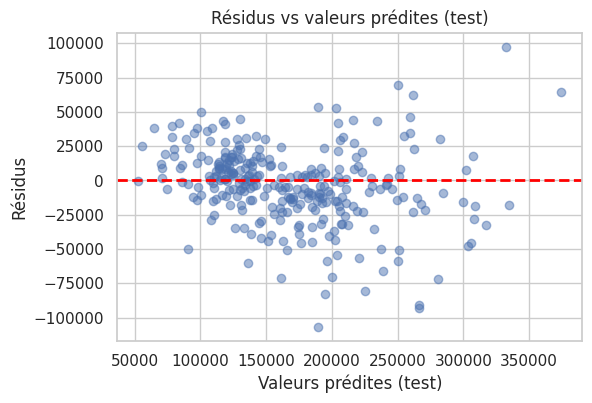

In [ ]:
# Passons à l'analyse des résidus
residuals = y_test - y_test_pred

plt.figure(figsize=(6,4))
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.axhline(0, color="red", linestyle="--", linewidth=2)
plt.xlabel("Valeurs prédites (test)")
plt.ylabel("Résidus")
plt.title("Résidus vs valeurs prédites (test)")
plt.show()


# **Questions :**
# 1. Les résidus semblent-ils centrés autour de 0 pour toutes les valeurs prédites ?
# 2. Voyez-vous une forme en courbe, en cône, ou des structures claires ?


## Réponses aux questions :

1. Les résidus semblent-ils centrés autour de 0 pour toutes les valeurs prédites ?
   Oui, les résidus semblent globalement **centrés autour de zéro** pour la plupart des valeurs prédites. La ligne rouge en pointillé à y=0 confirme cette tendance centrale, ce qui est un bon signe pour un modèle linéaire.

2. Voyez-vous une forme en courbe, en cône, ou des structures claires ?
   Il n'y a pas de forme en courbe prononcée ou de cône évident. Cependant, on peut observer une légère **augmentation de la dispersion des résidus à mesure que les valeurs prédites augmentent**. Cela pourrait indiquer une **hétéroscédasticité**, signifiant que la variance des erreurs n'est pas constante. En d'autres termes, le modèle pourrait avoir des erreurs plus grandes pour les maisons dont les prix sont plus élevés. On voit aussi quelques points isolés très éloignés de la ligne zéro, ce qui représente des erreurs de prédiction importantes.

# Synthèse et reflexion globale
#
## 1. Quelles sont, selon votre modèle, les variables les plus importantes pour expliquer `SalePrice` ?
## 2. Quelles limites voyez-vous à la régression linéaire dans ce contexte ?
## 3. Quelles transformations ou variantes de modèle aimeriez-vous tester :
##    - transformation log(SalePrice) ?
##    - ajout d'interactions entre variables (ex: surface * qualité) ?
## 4. Si vous deviez présenter ce modèle à un décideur non technique, que lui diriez-vous en 3 phrases sur :
##      - la performance
##      - les variables importantes
##      - les limites ?


# Synthèse et réflexion globale

## 1. Quelles sont, selon votre modèle, les variables les plus importantes pour expliquer `SalePrice` ?
Selon notre modèle actuel, qui inclut des variables numériques et l'encodage du quartier, les variables qui semblent avoir le plus grand impact sur le `SalePrice` sont:
*   **`Neighborhood` (le quartier)**: L'ajout de cette variable a entraîné une amélioration significative du R², passant de 0.73 à 0.77 sur le jeu de test, ce qui en fait un facteur très puissant.
*   **`OverallQual` (qualité globale)** et **`GrLivArea` (surface habitable)**: Ces deux variables ont montré des coefficients importants et ont contribué massivement à l'amélioration du R² lors du passage de la régression simple à la régression multiple. `GarageCars` et `YearBuilt` sont également pertinentes.

## 2. Quelles limites voyez-vous à la régression linéaire dans ce contexte ?
*   **Hétéroscédasticité**: L'analyse des résidus a montré une légère augmentation de la dispersion à mesure que les valeurs prédites augmentent, suggérant que la variance des erreurs n'est pas constante. Cela viole une des hypothèses clés de la régression linéaire.
*   **Linéarité des relations**: Bien que notre modèle s'en sorte bien, toutes les relations entre les variables et le prix ne sont pas forcément purement linéaires, et la régression linéaire pourrait ne pas capturer des relations plus complexes.
*   **Gestion des variables catégorielles**: L'encodage one-hot a créé de nombreuses nouvelles colonnes, ce qui peut rendre le modèle plus lourd et potentiellement plus sensible aux problèmes de multicolinéarité si les catégories sont très corrélées.
*   **Sensibilité aux Outliers**: Même après un filtrage des outliers extrêmes, la différence entre le RMSE et le MAE suggère que des erreurs importantes persistent, et que le modèle peut encore être influencé par des points aberrants.

## 3. Quelles transformations ou variantes de modèle aimeriez-vous tester :
*   **Transformation `log(SalePrice)`**: Étant donné l'asymétrie de la distribution de `SalePrice` et l'hétéroscédasticité des résidus, appliquer une transformation logarithmique à la variable cible (`SalePrice`) pourrait aider à normaliser la distribution et à stabiliser la variance des erreurs, améliorant potentiellement les performances du modèle.
*   **Ajout d'interactions entre variables**: Par exemple, `GrLivArea * OverallQual` ou `YearBuilt * OverallQual` pour capturer des effets combinés qui pourraient ne pas être bien représentés par les variables individuelles seules.
*   **Autres modèles de régression**: Tester des modèles non linéaires ou plus robustes tels que les forêts aléatoires (Random Forest), les méthodes de boosting (Gradient Boosting Regressor, XGBoost) ou des modèles régularisés (Ridge, Lasso) qui peuvent mieux gérer la complexité et la non-linéarité.
*   **Feature Engineering**: Créer de nouvelles caractéristiques pertinentes (ex: l'âge de la maison `YrSold - YearBuilt`, le nombre total de salles de bain, ou la surface totale non résidentielle).

## 4. Si vous deviez présenter ce modèle à un décideur non technique, que lui diriez-vous en 3 phrases sur :
*   **la performance**:
    "Notre modèle actuel est capable d'expliquer environ 77% des variations du prix des maisons, ce qui nous donne une estimation de départ fiable pour évaluer les propriétés."
*   **les variables importantes**:
    "Les facteurs clés influençant le prix sont la surface habitable, la qualité générale de la maison, la taille du garage, l'année de construction, et surtout, le quartier, qui est un indicateur très puissant."
*   **les limites**:
    "Bien que le modèle soit performant, il peut encore être amélioré, en particulier pour les maisons très chères, et nous pourrions explorer des approches plus avancées pour une précision encore plus grande."